## Cross-Validation

In this notebook, we will optimize hyper parameters using Cross-Validation Schemes.

In [17]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import comb

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    GridSearchCV,
    train_test_split
)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X.shape

(569, 30)

In [4]:
# target percentage
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## K-Fold Cross Validation

In [7]:
# set up the logistic regression 
logit = LogisticRegression(penalty='l2',C=10, solver='liblinear', max_iter=10000, n_jobs=2)

# set up the param_grid 

param_grid = dict(penalty=['l1','l2'],
                 C=[0.1, 1, 10]
                 )

# set up kfold
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# estimate generalization error using cross_validate
clf = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='accuracy',
                   refit=True, # refit the data with the best params
                   cv=kf # k-fold
                  )

search = clf.fit(X_train, y_train)

# best hyper parameters
search.best_params_

{'C': 10, 'penalty': 'l2'}

In [24]:
# clf is basically a dictionary that returns the scores and other cross validation results
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.919620,0.012606
1,"{'C': 0.1, 'penalty': 'l2'}",0.934747,0.019812
2,"{'C': 1, 'penalty': 'l1'}",0.944810,0.024360
3,"{'C': 1, 'penalty': 'l2'}",0.944778,0.025651
4,"{'C': 10, 'penalty': 'l1'}",0.947247,0.014592
5,"{'C': 10, 'penalty': 'l2'}",0.949778,0.013609


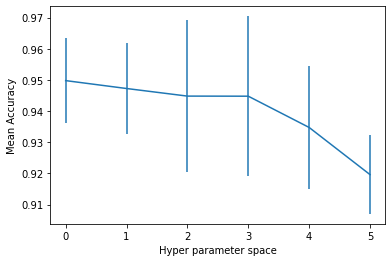

In [25]:
# plot the mean and std scores

results.sort_values(by='mean_test_score', ascending= False, inplace = True)
results.reset_index(drop=True, inplace = True)

results['mean_test_score'].plot(yerr=(results['std_test_score'], results['std_test_score']))
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyper parameter space')
plt.show();

In [26]:
# get the predictions

preds_train = search.predict(X_train)
preds_test = search.predict(X_test)

print('Train data score : {}'.format(accuracy_score(y_train, preds_train)))
print('Test data score : {}'.format(accuracy_score(y_test, preds_test)))

Train data score : 0.9623115577889447
Test data score : 0.9532163742690059


- Now we can do the same process for all the Cross validation schemes